# Schelling's Segregation on a Graph
## By Moses A. Boudourides & Sergios T. Lenis

In [1]:
%matplotlib inline

import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
n = 30
m = 80
G=nx.gnm_random_graph(n,m) 
for i in G.nodes():
    if G.degree(i)<=1:
        G.remove_node(i)
print nx.is_connected(G)

# G = nx.karate_club_graph()
# G = nx.florentine_families_graph()

# nx.draw(G, with_labels=False)

True


In [3]:
n=len(G.nodes())
print n
n1=int(0.45*n)
n2=int(0.45*n)
n3=n-n1-n2
print n1, n2, n3, n

30
13 13 4 30


In [4]:
com=0.8      # Satisfaction coefficient
mxit=20000   # Numer of iterations

In [5]:
a1=random.sample(list(G.nodes()),n1)
a2=random.sample(list(set(G.nodes()) - set(a1)),n2)
a3=list(set(G.nodes()) - set(a1).union(set(a2)))
# print a1, len(a1)
# print a2, len(a2)
# print a3, len(a3)
# n == len(a1)+len(a2)+len(a3)

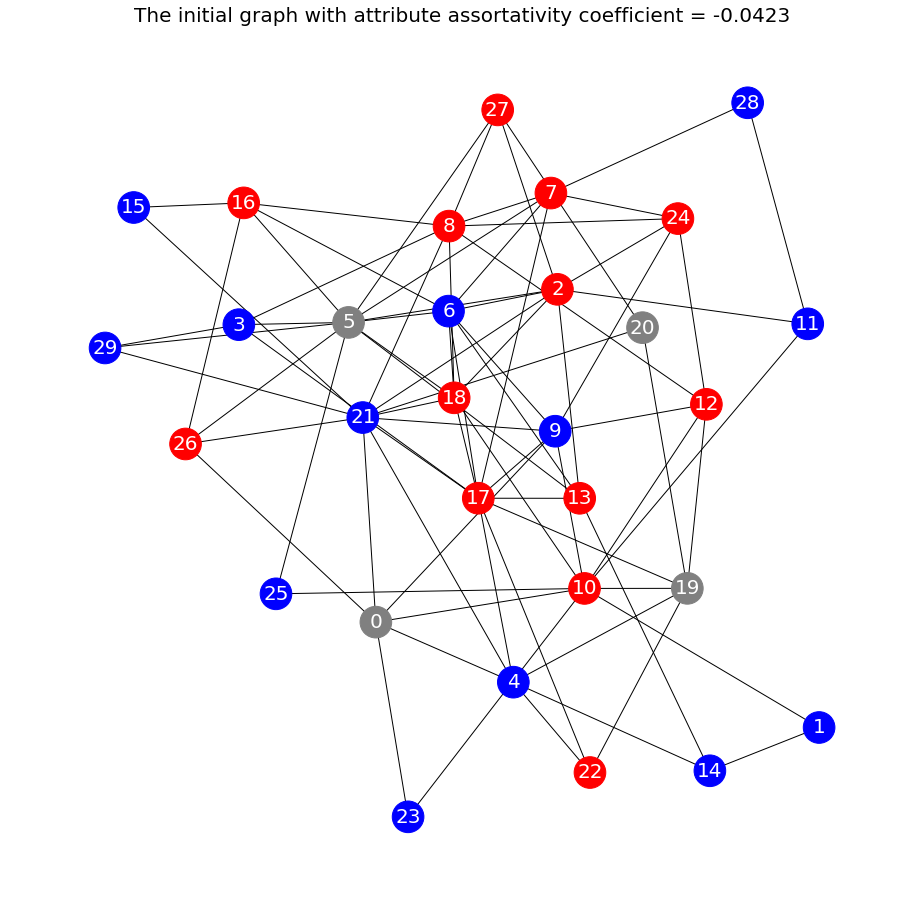

In [6]:
keys = a1 + a2 + a3
values = ['red' for i in range(len(a1))]+['blue' for i in range(len(a2))]+['grey' for i in range(len(a3))]
attdict = dict(zip(keys, values))
# attdict
nx.set_node_attributes(G, 'color', attdict)
# G.nodes(data=True)
plt.figure(figsize=(12,12))
# pos = dict( (n, n) for n in G.nodes() )
# labels = dict( ((i, j), j * 10 + i) for i, j in G.nodes() )
pos=nx.spring_layout(G)
nx.draw(G,pos=pos,with_labels=True,node_size=1000,font_size=20,font_color="w",
        nodelist=attdict.keys(),node_color=attdict.values()) #with_labels=True,
ss="The initial graph with attribute assortativity coefficient = %.4f" %(nx.attribute_assortativity_coefficient(G, 'color'))
ptt=plt.title(ss, fontsize=20) 
# print 'The initial attribute assortativity coefficient is', nx.attribute_assortativity_coefficient(G, 'color')

In [7]:
na1dict={}
na2dict={}
na3dict={}
lna1dict={}
lna2dict={}
lna3dict={}
for i in a1:
    na1dict[i]=G.neighbors(i)
    lna1dict[i]=len(G.neighbors(i))
for i in a2:
    na2dict[i]=G.neighbors(i)
    lna2dict[i]=len(G.neighbors(i))
for i in a3:
    na3dict[i]=G.neighbors(i)
    lna3dict[i]=len(G.neighbors(i))
# print na1dict
# print na2dict
# print na3dict
# print lna1dict
# print lna2dict
# print lna3dict
ndic = dict(lna1dict.items() + lna2dict.items() + lna3dict.items())
# ndic == G.degree()
# print lna1dict
# print G.nodes(data=True)

In [8]:
ndics={'blue':lna2dict,'red':lna1dict,'grey':lna3dict}
colsdic={}
for nd in G.nodes(data=True):
    cols=nd[1]['color']
    if cols not in colsdic:
        colsdic[cols]=[]
    colsdic[cols].append(nd[0])
import random as rd

def count_colors(G,nd,cols):
    rms=0
    for nn in G.neighbors(nd):
        if G.node[nn]['color']==cols:  #cols != 'grey' and 
            rms+=1
    return rms

def count_grey(G,nd):
    rms=0
    for i in G.neighbors(nd):
        if G.node[i]['color']=='grey':  
            rms+=1
    return rms

def prosom(G,colsdic,com,mxit,lim):
    check=True
    for i in range(mxit):
        ch=0
        cd=set()
        for nd in G.nodes(data=True):
            cols=nd[1]['color']
            if cols!='grey': 
                if count_colors(G,nd[0],'grey')==0:
                    if count_colors(G,nd[0],cols) < int(com*G.degree(nd[0])): 
                        ch+=1
                        cd.add(nd[0])
                else:
                    if count_colors(G,nd[0],cols) < int(com*(G.degree(nd[0])-count_grey(G,nd[0]))): 
                        ch+=1
                        cd.add(nd[0])
        if ch<=lim: 
#             print 'iii',i,cd,ch
            break
        else:
            for nd in G.nodes(data=True):
                cols=nd[1]['color']
                if cols!='grey': 
                    if count_colors(G,nd[0],'grey')==0:
                        if count_colors(G,nd[0],cols) < int(com*G.degree(nd[0])):
                            dn =rd.choice(colsdic['grey'])
                            G.add_node(dn,color=cols)
                            G.add_node(nd[0],color='grey')
                            colsdic[cols].remove(nd[0])
                            colsdic['grey'].remove(dn)
                            colsdic[cols].append(dn)
                            colsdic['grey'].append(nd[0])
                    else:
                        if count_colors(G,nd[0],cols) < int(com*(G.degree(nd[0])-count_grey(G,nd[0]))):
                            dn =rd.choice(colsdic['grey'])
                            G.add_node(dn,color=cols)
                            G.add_node(nd[0],color='grey')
                            colsdic[cols].remove(nd[0])
                            colsdic['grey'].remove(dn)
                            colsdic[cols].append(dn)
                            colsdic['grey'].append(nd[0])
#     print ch,cd,'ooo'
    return G,colsdic

EVERY AGENT IS SATISFIED!


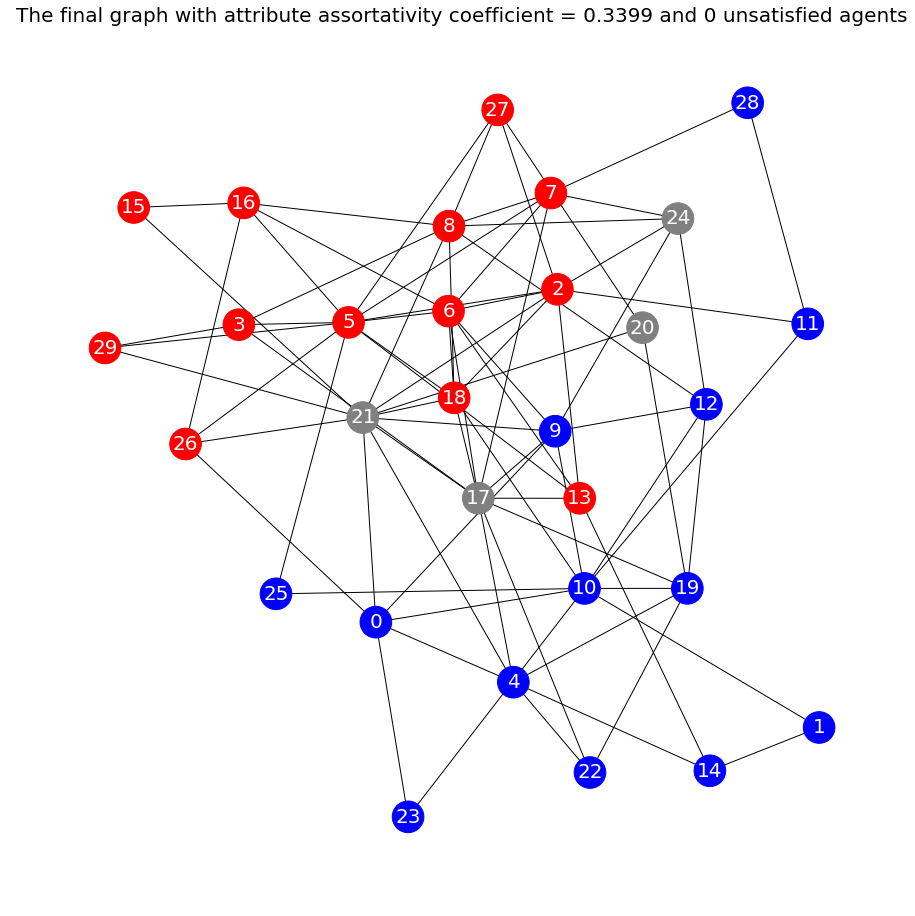

In [9]:
F,colss=prosom(G,colsdic,com,mxit,0)

# print 'The final attribute assortativity coefficient is', nx.attribute_assortativity_coefficient(F, 'color')                        

unsatisfied=[]
colsr=[]
#com=0.7
for nd in F.nodes(data=True):
    if nd[1]['color'] != 'grey':
        if count_colors(G,nd[0],'grey')==0:
            if count_colors(F,nd[0],nd[1]['color']) < int(com*F.degree(nd[0])): #com - 1: #==0: 
                unsatisfied.append(nd[0])
                if nd[1]['color']=='blue':
                    colsr.append('green')
                elif nd[1]['color']=='red':
                    colsr.append('magenta')
                else:
                    colsr.append(nd[1]['color'])
        else:
            if count_colors(G,nd[0],cols) < int(com*(G.degree(nd[0])-count_grey(G,nd[0]))):
                colsr.append(nd[1]['color'])
# print 'Unsatisfied Agents =', unsatisfied, len(unsatisfied)
if len(unsatisfied) != 0:
    print 'There exist %i unsatisfied agents %s' %(len(unsatisfied),unsatisfied)
#     for nd in F.nodes(data=True):
#         if nd[0] in unsatisfied:
#             print 'The level of satisfiction of node %s is %i and its actual satisfaction is %.2f' %(nd[0],int(com*F.degree(nd[0])),count_colors(F,nd[0],nd[1]['color']))
else:
    print 'EVERY AGENT IS SATISFIED!'
    
plt.figure(figsize=(12,12))
nc=[nd[1]['color'] for nd in F.nodes(data=True)]
nx.draw(F,pos=pos,with_labels=True,node_size=1000,font_size=20,font_color="w",
        nodelist=F.nodes(),node_color=nc) #with_labels=True,
ss="The final graph with attribute assortativity coefficient = %.4f and %i unsatisfied agents" %(nx.attribute_assortativity_coefficient(F, 'color'),len(unsatisfied))
ptt=plt.title(ss, fontsize=20) 

In [10]:
# node=19
# print F.node[node]['color'], com
# print
# for i in F.neighbors(node):
#     print F.node[i]['color']

In [11]:
if len(unsatisfied) != 0:
    F,colss=prosom(F,colss,com,2*mxit,0)
#     print 'The final attribute assortativity coefficient is', nx.attribute_assortativity_coefficient(F, 'color')                        
    unsatisfied=[]
    colsr=[]
    for nd in F.nodes(data=True):
        if nd[1]['color'] != 'grey':
            if count_colors(G,nd[0],'grey')==0:
                if count_colors(F,nd[0],nd[1]['color']) < int(com*F.degree(nd[0])): #com - 1: #==0: 
                    unsatisfied.append(nd[0])
                    if nd[1]['color']=='blue':
                        colsr.append('green')
                    elif nd[1]['color']=='red':
                        colsr.append('magenta')
                    else:
                        colsr.append(nd[1]['color'])
            else:
                if count_colors(G,nd[0],cols) < int(com*(G.degree(nd[0])-count_grey(G,nd[0]))):
                    colsr.append(nd[1]['color'])
# print 'Unsatisfied Agents =', unsatisfied, len(unsatisfied)
    if len(unsatisfied) != 0:
        print 'There exist %i unsatisfied agents %s' %(len(unsatisfied),unsatisfied)
#         for nd in F.nodes(data=True):
#             if nd[0] in unsatisfied:
#                 print 'The level of satisfiction of node %s is %i and its actual satisfaction is %.2f' %(nd[0],int(com*F.degree(nd[0])),count_colors(F,nd[0],nd[1]['color']))
    else:
        print 'EVERY AGENT IS SATISFIED!'    
    plt.figure(figsize=(12,12))
    nc=[nd[1]['color'] for nd in F.nodes(data=True)]
    nx.draw(F,pos=pos,with_labels=True,node_size=1000,font_size=20,font_color="w",nodelist=F.nodes(),node_color=nc) #colss)
    ss="The final graph with attribute assortativity coefficient = %.4f and %i unsatisfied agents" %(nx.attribute_assortativity_coefficient(F, 'color'),len(unsatisfied))
    ptt=plt.title(ss, fontsize=20) 
    unsatisfied=[]
    colsr=[]
    for nd in F.nodes(data=True):
        if nd[1]['color'] != 'grey':
            if count_colors(G,nd[0],'grey')==0:
                if count_colors(F,nd[0],nd[1]['color']) < int(com*F.degree(nd[0])): #com - 1: #==0: 
                    unsatisfied.append(nd[0])
                    if nd[1]['color']=='blue':
                        colsr.append('green')
                    elif nd[1]['color']=='red':
                        colsr.append('magenta')
                    else:
                        colsr.append(nd[1]['color'])
            else:
                if count_colors(G,nd[0],cols) < int(com*(G.degree(nd[0])-count_grey(G,nd[0]))):
                    colsr.append(nd[1]['color'])

In [12]:
# node=6
# print F.node[node]['color'], com
# print
# for i in F.neighbors(node):
#     print F.node[i]['color']